In [1]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2

2022-11-28 11:10:18.752056: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

2022-11-28 10:18:38.727216: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 10:18:38.738965: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-11-28 10:18:38.983565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-28 10:18:38.983744: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 Ti computeCapability: 7.5
coreClock: 1.485GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s


In [3]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)
# def limitgpu(maxmem):
# 	gpus = tf.config.list_physical_devices('GPU')
# 	if gpus:
# 		# Restrict TensorFlow to only allocate a fraction of GPU memory
# 		try:
# 			for gpu in gpus:
# 				tf.config.experimental.set_virtual_device_configuration(gpu,
# 						[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=maxmem)])
# 		except RuntimeError as e:
# 			# Virtual devices must be set before GPUs have been initialized
# 			print(e)


# # 1.5GB
# limitgpu(512) 

In [4]:
# def limitgpu(maxmem):
# 	gpus = tf.config.list_physical_devices('GPU')
# 	if gpus:
# 		# Restrict TensorFlow to only allocate a fraction of GPU memory
# 		try:
# 			for gpu in gpus:
# 				tf.config.experimental.set_virtual_device_configuration(gpu,
# 						[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=maxmem)])
# 		except RuntimeError as e:
# 			# Virtual devices must be set before GPUs have been initialized
# 			print(e)

(416, 416, 3)

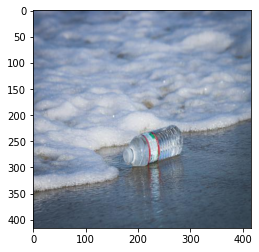

In [5]:
img = image.load_img("Dataset/train/Underwater_Plastic/1_jpg.rf.871d937782eb997e42750b67dd22aa8d.jpg")
plt.imshow(img)
cv2.imread("Dataset/train/Underwater_Plastic/1_jpg.rf.871d937782eb997e42750b67dd22aa8d.jpg").shape

In [6]:
training = "Dataset/train"
training_datagen = ImageDataGenerator(rescale = 1/255, horizontal_flip = True,rotation_range=30,fill_mode='nearest')
validation = "Dataset/valid"
validation_datagen = ImageDataGenerator(rescale = 1/255)


In [7]:
import os
os.listdir(training)

['Not_Plastic', 'Underwater_Plastic']

In [8]:
train_generator = training_datagen.flow_from_directory(training,target_size=(416,416),class_mode='categorical',batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(validation, target_size=(416,416), class_mode='categorical', batch_size= 16)

Found 2181 images belonging to 2 classes.
Found 655 images belonging to 2 classes.


In [9]:
model_plastic = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(416,416, 3)),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model_plastic.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc'])


2022-11-28 10:18:41.993314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-28 10:18:41.993433: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 Ti computeCapability: 7.5
coreClock: 1.485GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s
2022-11-28 10:18:41.994166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-28 10:18:41.994621: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-28 10:18:41.994664: I ten

In [10]:
history = model_plastic.fit(train_generator,steps_per_epoch = 15,epochs = 50,
                            validation_data = validation_generator,validation_steps = 15)

2022-11-28 10:18:45.151427: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-28 10:18:45.152229: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2894565000 Hz


Epoch 1/50


2022-11-28 10:18:48.401108: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-11-28 10:18:49.526377: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8600
2022-11-28 10:18:50.758219: W tensorflow/core/common_runtime/bfc_allocator.cc:271] Allocator (GPU_0_bfc) ran out of memory trying to allocate 938.03MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-11-28 10:18:50.758351: W tensorflow/core/common_runtime/bfc_allocator.cc:271] Allocator (GPU_0_bfc) ran out of memory trying to allocate 938.03MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-11-28 10:18:50.758780: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.

15/15 [==============================] - 42s 2s/step - loss: 0.4738 - acc: 0.8240 - val_loss: 0.3085 - val_acc: 0.9750
Epoch 2/50
15/15 [==============================] - 37s 2s/step - loss: 0.3101 - acc: 0.8768 - val_loss: 0.2639 - val_acc: 0.8625
Epoch 3/50
15/15 [==============================] - 38s 3s/step - loss: 0.2593 - acc: 0.8917 - val_loss: 0.1494 - val_acc: 0.9667
Epoch 4/50
15/15 [==============================] - 36s 2s/step - loss: 0.2433 - acc: 0.9223 - val_loss: 0.1033 - val_acc: 0.9792
Epoch 5/50
15/15 [==============================] - 38s 3s/step - loss: 0.2388 - acc: 0.9104 - val_loss: 0.1484 - val_acc: 0.9667
Epoch 6/50
15/15 [==============================] - 39s 3s/step - loss: 0.2159 - acc: 0.9094 - val_loss: 0.1992 - val_acc: 0.9167
Epoch 7/50
15/15 [==============================] - 38s 3s/step - loss: 0.1997 - acc: 0.9198 - val_loss: 0.1647 - val_acc: 0.9750
Epoch 8/50
15/15 [==============================] - 37s 3s/step - loss: 0.2189 - acc: 0.9190 - val_lo

In [5]:
model_plastic.save('plastic_detection.h5')

NameError: name 'model_plastic' is not defined

In [6]:
from keras.models import load_model
model_plastic = load_model('plastic_detection.h5')

Average Accuracy : 0.9394015216827393


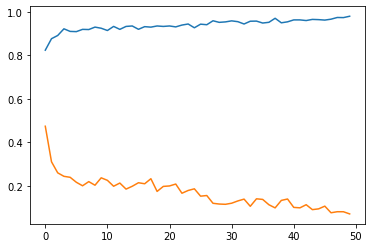

In [13]:
accs = history.history['acc']
print("Average Accuracy :",sum(accs)/len(accs))
plt.plot(accs)

loss = history.history['loss']
plt.plot(loss)

In [3]:
def detect(str,flag):
    if(flag == True):
        return "Detected " + str
    
    else:
        return "Didn't detect " + str

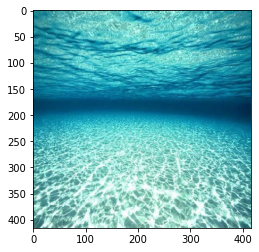

Didn't detect Underwater_Plastic


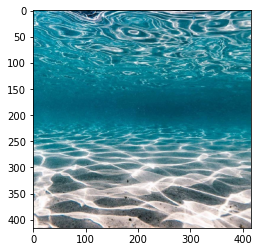

Didn't detect Underwater_Plastic


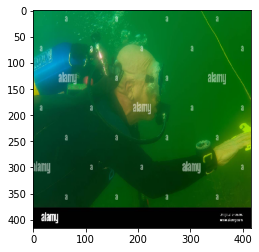

Didn't detect Underwater_Plastic


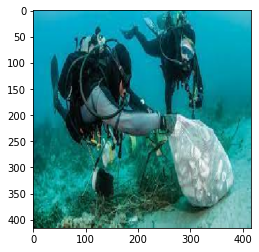

Detected Underwater_Plastic


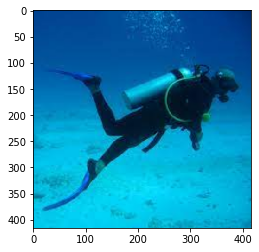

Didn't detect Underwater_Plastic


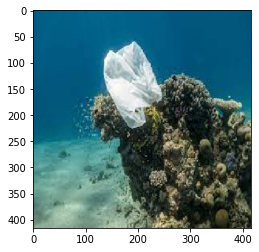

Detected Underwater_Plastic


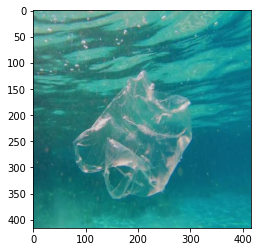

Detected Underwater_Plastic


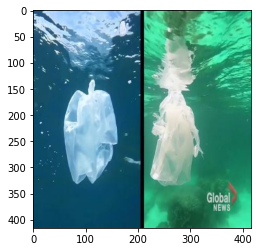

Detected Underwater_Plastic


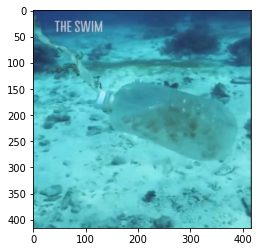

Detected Underwater_Plastic


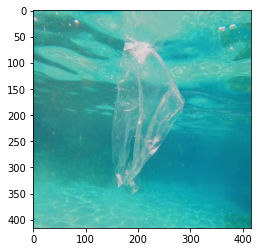

Detected Underwater_Plastic


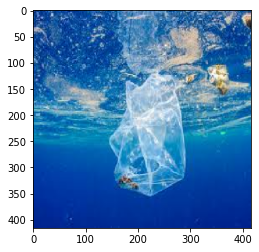

Didn't detect Underwater_Plastic


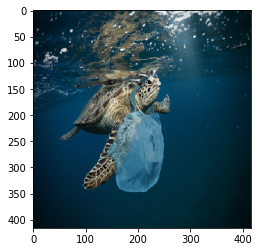

Detected Underwater_Plastic


In [7]:
import numpy as np
import os
from matplotlib import pyplot as plt
path = 'Dataset/test'
for i in os.listdir(path):
    img = image.load_img(path + '/' + i, target_size = (416,416))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255
    classes = model_plastic.predict(x)
    plastic_flag = detect("Underwater_Plastic",np.argmax(classes[0]) == 1 )
    print(plastic_flag)